## 학습목표
 1. stack, unstack 함수 이해하기

In [26]:
import numpy as np
import pandas as pd

In [27]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })

In [2]:
df = pd.DataFrame({
    '지역': ['서울', '서울', '서울', '경기', '경기', '부산', '서울', '서울', '부산', '경기', '경기', '경기'],
    '요일': ['월요일', '화요일', '수요일', '월요일', '화요일', '월요일', '목요일', '금요일', '화요일', '수요일', '목요일', '금요일'],
    '강수량': [100, 80, 1000, 200, 200, 100, 50, 100, 200, 100, 50, 100],
    '강수확률': [80, 70, 90, 10, 20, 30, 50, 90, 20, 80, 50, 10]
                  })

df

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


####  stack & unstack
 - stack : 컬럼 레벨에서 인덱스 레벨로 dataframe 변경
  - 즉, 데이터를 쌓아올리는 개념으로 이해하면 쉬움
 - unstack : 인덱스 레벨에서 컬럼 레벨로 dataframe 변경
  - stack의 반대 operation
 
 - 둘은 역의 관계에 있음

In [3]:
new_df = df.set_index(['지역', '요일'])
new_df

강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30
서울 목요일    50    50
   금요일   100    90
부산 화요일   200    20
경기 수요일   100    80
   목요일    50    50
   금요일   100    10

In [6]:
df.set_index(['지역','요일']).unstack(1).stack(0)

요일         금요일   목요일     수요일    월요일    화요일
지역                                        
경기 강수량   100.0  50.0   100.0  200.0  200.0
   강수확률   10.0  50.0    80.0   10.0   20.0
부산 강수량     NaN   NaN     NaN  100.0  200.0
   강수확률    NaN   NaN     NaN   30.0   20.0
서울 강수량   100.0  50.0  1000.0  100.0   80.0
   강수확률   90.0  50.0    90.0   80.0   70.0

In [7]:
df.head()

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20


In [15]:
df.head()

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20


In [18]:
df.set_index(['지역','요일']).unstack(0).stack(0).unstack(0).stack(0)

요일         금요일   목요일     수요일    월요일    화요일
     지역                                   
강수량  경기  100.0  50.0   100.0  200.0  200.0
     부산    NaN   NaN     NaN  100.0  200.0
     서울  100.0  50.0  1000.0  100.0   80.0
강수확률 경기   10.0  50.0    80.0   10.0   20.0
     부산    NaN   NaN     NaN   30.0   20.0
     서울   90.0  50.0    90.0   80.0   70.0

<AxesSubplot:>

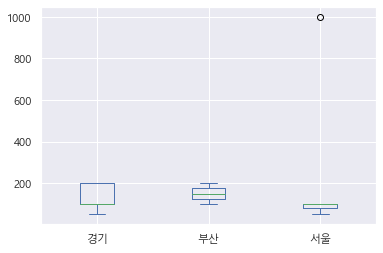

In [29]:
df.groupby(['지역','요일']).mean()['강수량'].unstack(0).plot(kind='box')

In [4]:
# 첫번째 레벨의 인덱스를 컬럼으로 이동
new_df.unstack(0)

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

In [5]:
# 두번째 레벨의 인덱스를 컬럼으로 이동
new_df.unstack(1)

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [6]:
# 첫번째 레벨의 컬럼을 인덱스로 이동
new_df.unstack(0).stack(0)

지역           경기     부산      서울
요일                            
금요일 강수량   100.0    NaN   100.0
    강수확률   10.0    NaN    90.0
목요일 강수량    50.0    NaN    50.0
    강수확률   50.0    NaN    50.0
수요일 강수량   100.0    NaN  1000.0
    강수확률   80.0    NaN    90.0
월요일 강수량   200.0  100.0   100.0
    강수확률   10.0   30.0    80.0
화요일 강수량   200.0  200.0    80.0
    강수확률   20.0   20.0    70.0

In [7]:
new_df.unstack(0).stack(1)

강수량  강수확률
요일  지역              
금요일 경기   100.0  10.0
    서울   100.0  90.0
목요일 경기    50.0  50.0
    서울    50.0  50.0
수요일 경기   100.0  80.0
    서울  1000.0  90.0
월요일 경기   200.0  10.0
    부산   100.0  30.0
    서울   100.0  80.0
화요일 경기   200.0  20.0
    부산   200.0  20.0
    서울    80.0  70.0

In [8]:
new_df.stack

<bound method DataFrame.stack of          강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30
서울 목요일    50    50
   금요일   100    90
부산 화요일   200    20
경기 수요일   100    80
   목요일    50    50
   금요일   100    10>